# Games analysis

## Project descrition
You work at Streamchick, an online store that sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine a game's success. This will allow you to bet on a potentially popular product and plan advertising campaigns.

You have data up to 2016. Let's imagine that it is now December 2016, and you are planning a campaign for 2017. You need to work out how to use the data. It doesn't matter whether you are forecasting sales for 2017 based on 2016 data or for 2027 based on 2026 data.

The data set includes the abbreviation ESRB (Entertainment Software Rating Board), which is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as “For Adults,” “For Younger Children,” or “For Teens.”

### Data

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


In [1]:
#загружаем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузка данных

In [2]:
#Загрузим датафреймы
try:
    df = pd.read_csv('/Users/darianechaeva/yandex_data_analyst/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
    
    
#Изучим общую информацию о датафрейме    
print(df.info())
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10948,The Revenge of Shinobi,GBA,2002.0,Platform,0.07,0.02,0.00,0.00,51.0,tbd,E
6157,Sesame Street: Elmo's A-to-Zoo Adventure,DS,2010.0,Misc,0.26,0.00,0.00,0.02,NaN,NaN,NaN
11805,Need for Speed Underground 2,PC,2004.0,Racing,0.00,0.06,0.00,0.01,82.0,8.5,T
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN
14773,Loading Human,PS4,2016.0,Adventure,0.01,0.01,0.00,0.00,NaN,NaN,NaN
3620,God of War: Origins Collection,PS3,2011.0,Action,0.39,0.08,0.02,0.06,84.0,8.4,M
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9149,Bio FREAKS,N64,1998.0,Action,0.11,0.03,0.00,0.00,NaN,NaN,NaN
3021,Adventures of Tron,2600,1981.0,Action,0.63,0.03,0.00,0.01,NaN,NaN,NaN
14334,Cooking Mama 5: Bon Appetit!,3DS,2013.0,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [3]:
#количество пропущенных значений для каждого столбца:
print(df.isna().sum())
# и доля таких пропущенных значений
display(pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm'))

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


- В представленном датафрейме есть пропуски, в некоторых колонках до половины данных отсутствует, что свидетельствует о плохом качестве исходных данных
- Не все столбцы имеют корректный тип данных, например Year_of_Release имеет тип данных float, хотя это год, User_Score представлен как object, а не float
- Названия колонок записаны не в оптимальном регистре

#### Предобработка данных

In [4]:
# заменим названия столбцов, приведя к нижнему регистру
df.columns = ['name', 'platform', 'year_of_release', 'genre','na_sales', 'eu_sales', 
              'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
#df.columns = df.columns.str.lower() # альтернативный вариант приведения названия колонок к нижнему регистру

In [5]:
df.loc[df[df.duplicated(subset=['name', 'platform'], keep=False)].index] 
# код, чтобы изучить строки с явными дубликатами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [6]:
#проверим данные на явные дубликаты, чтобы удалить при необходимости до дальнейшей обработки
print('Явные дубликаты в датафрейме до удаления:', df.duplicated(subset=['name', 'platform'],\
                                                     keep='first').sum())

# удалим явные дубликаты из df
df = df.drop_duplicates(subset=['name', 'platform'], keep='first')
print('Явные дубликаты в датафрейме после удаления:', df.duplicated(subset=['name', 'platform'],\
                                                     keep='first').sum())

Явные дубликаты в датафрейме до удаления: 5
Явные дубликаты в датафрейме после удаления: 0


При попытке заменить тип данных в колонке year_of_release на int, обнаружена ошибка ValueError: Cannot convert non-finite values (NA or inf) to integer. Далее для колонки user_score возникла ошибка "could not convert string to float: 'tbd'". Изучим эти колонки внимательнее

In [7]:
# Посмотрим, какие вообще значения представлены  в этом столбце
print(df['year_of_release'].unique())
print(df['user_score'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Действительно, колонка с годом релиза содержит пропуски и из начального этапа мы знаем, что их меньше 2%, поэтому дальше эти пропуски будут удалены. Колонка user_score содержит изначально очень много пропусков, но заменить их по имющимся данным нечем. Поэтому, дополнительно заменим tbd, что вероятно является аббревиатурой от to be defined, на NaN и преобразуем колонку к типу данных float.

In [8]:
# Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
try:
    df['year_of_release'] = df['year_of_release'].astype(int)
    df['user_score'] = df['user_score'].astype(float)
except:
    # Замена 'tbd' на NaN и конвертация в int
    df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
    df.dropna(subset=['year_of_release'], inplace=True)
    df['year_of_release'] = df['year_of_release'].astype(int)
    df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
    df['user_score'] = df['user_score'].astype(float)

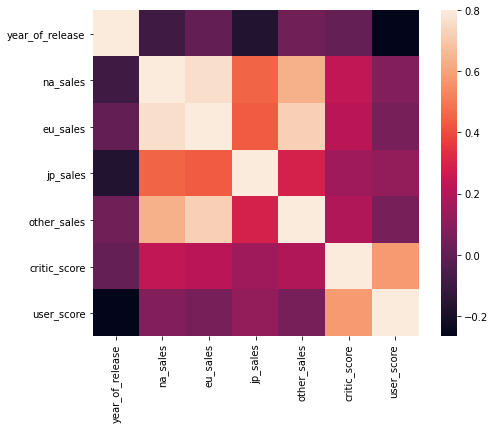

In [9]:
#Чтобы предложить замену пропускам в столбцах, посмотрим, как данные между собой коррелируют 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

После преобразования object колонок к числовым типам данным посмотрим с помощью heatmap, есть ли между какими-нибудь данными достаточно хорошая корреляция, чтобы можно было обработать пропуски в critic_score и user_score. Видно, что оценка критиков коррелирует с оценкой пользователей (коэффициент корреляции 0,6 примерно), но у колонки с оценкой критиков пропусков примерно столько же, поэтому эта операция не имеет смысла. На этом этапе мы вынуждены оставить пропуски.

In [10]:
#количество пропущенных значений для каждого столбца:
print(df.isna().sum())
# и доля таких пропущенных значений
display(pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm'))


name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,54.600000


На этом этапе за счет удаления пропусков в year_of_release мы удалили 1,6% данных, а за счет замены tbd user_score у нас прибавилось 14,6% пропусков.

In [11]:
df[(df['user_score'].isna()) & ((df['na_sales'] < 0.2) | (df['eu_sales'] < 0.2) | (df['jp_sales'] < 0.2))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
82,GoldenEye 007,N64,1997,Shooter,5.80,2.01,0.13,0.15,NaN,NaN,NaN
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
df[df['year_of_release'] < 1996].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 1 to 16666
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             705 non-null    object 
 1   platform         706 non-null    object 
 2   year_of_release  706 non-null    int64  
 3   genre            705 non-null    object 
 4   na_sales         706 non-null    float64
 5   eu_sales         706 non-null    float64
 6   jp_sales         706 non-null    float64
 7   other_sales      706 non-null    float64
 8   critic_score     4 non-null      float64
 9   user_score       4 non-null      float64
 10  rating           5 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 66.2+ KB


Причина появления такого количества пропусков может быть в непопулярности конкретных игр, что приводит к малому числу оценок или их отсутствию. Если вывести таблицу, где продажи игры хотя в одном из регионов не превысили 200 тысяч копий, то мы охватим почти все пропуски в графе user_score в нашем датафрейме. Еще одна причина может быть в том, что у игр до определенного периода рейтинга пользователей и критиков не существовало. Например, до 1995 года число ненулевых значений в колонках user_score и critic_score всего 4 из 700 строк.

In [13]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [14]:
display(df.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
3505,The Sims 3: World Adventures,PC,2009,Simulation,0.02,0.18,0.00,0.38,81.0,8.0,T,0.58
11166,Pillow Pets,DS,2011,Adventure,0.08,0.00,0.00,0.01,NaN,NaN,E,0.09
12404,The Legend of Heroes: Trails in the Sky Second...,PSP,2007,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
634,Midnight Club: Los Angeles,PS3,2008,Racing,1.56,0.53,0.05,0.31,82.0,8.2,T,2.45
11459,Little League World Series Baseball 2010,PS3,2010,Sports,0.07,0.00,0.00,0.01,61.0,NaN,E,0.08
11561,Crush,PSP,2007,Puzzle,0.07,0.00,0.00,0.01,83.0,9.0,E10+,0.08
5550,Nicktoons: Movin',PS2,2004,Action,0.16,0.12,0.00,0.04,NaN,NaN,E,0.32
13541,Crushed Baseball,GBA,2004,Sports,0.03,0.01,0.00,0.00,NaN,NaN,E,0.04
16141,Abunai: Koi no Sousa Shitsu,PSP,2012,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
8035,Atelier Shallie: Alchemists of the Dusk Sea,PS3,2014,Role-Playing,0.06,0.02,0.08,0.02,76.0,7.7,E10+,0.18


#### Исследовательский анализ данных

1. Посмотрим, сколько игр выпускалось в разные годы:

In [15]:
df['year_of_release'].value_counts().describe()

count      37.000000
mean      444.378378
std       451.524784
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

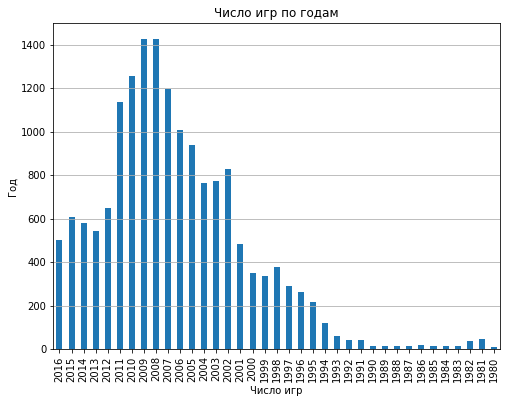

''

In [16]:
(df['year_of_release'].value_counts().sort_index(ascending=False)
 .plot(kind='bar', grid=True, style='o-', figsize=(8, 6))
    )
plt.title('Число игр по годам')
plt.xlabel('Число игр', fontsize=10)
plt.ylabel('Год') 
plt.grid(axis='x')

plt.show()
;

В датафрейме представлены данные за период с 1980 по 2016 год (этот год, как известно заранее, может быть неполным). Из графика выше видно, что интерес к играм неуклонно рос с 1990 года  до 2008 - 2009 года (1400 игр в год). Затем происходит спад и в 2016 году число выпущенных игр составило около 500. Оптимально для анализа было бы рассматривать период с 1995 (год, когда число игр впервые превысило 200 шт) до 2016. Если нужно сделать прогноз на 2017 год, то рассматривать нужно период с 2013, когда число выпущенных игр упало с > 1000 до 600.

2. Посмотрим, как менялись продажи по платформам. 
Изучим платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [17]:
# Создадим список топ платформ по сумме их продаж и выберем только 7 топовых
top_platforms = df.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(7).index.tolist()

# теперь сформируем датафрейм с этими платформами и данными по ним только за определенный период времени
df_top_platforms = df[df['year_of_release'] >= 1995].query('platform in @top_platforms')


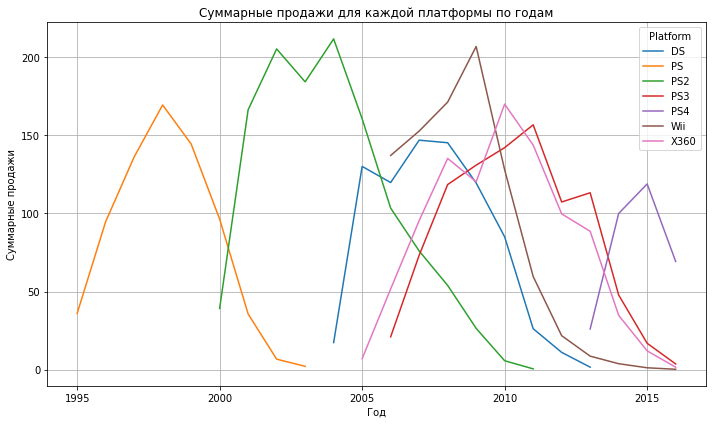

In [18]:
# сформируем сводную таблицу по топплатформам так, чтобы была платформа и ее продажи по году
df_pivot = df_top_platforms.pivot_table(index=['platform', 'year_of_release'], values='sales_total',
                          aggfunc={'sales_total': sum}).reset_index()

# построим на одном графике продажи для каждой платформы по годам
plt.figure(figsize=(10, 6))

for platform in df_pivot['platform'].unique():
    platforms = df_pivot[df_pivot['platform'] == platform]
    sns.lineplot(data=platforms, x="year_of_release", y="sales_total", label=platform)

plt.title('Суммарные продажи для каждой платформы по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(title='Platform', loc='upper right')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

За какой характерный срок появляются новые и исчезают старые платформы? График выше свидетельствует, что топовые платформы "живут" около 10 лет, сначала достигая максимума продаж за срок 3-5 лет и дальше их продажи падают.

Дальнейший анализ будем проводить только на данных за соответствующий актуальный период (с 2013 года)

3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [19]:
df_2013 = df[df['year_of_release'] >= 2013] # для дальнейшего анализа будем рассматриватьь период с 2013 года, 
#поэтому запишем это как новый датафрейм

In [20]:
# сводная таблица для продаж у платформы в зависимости от года
df_sales = (df_2013.pivot_table(index=['platform', 'year_of_release'], values='sales_total', aggfunc='sum')
    .reset_index()
           )
#print(df_sales.shape[0]) # строчка для проверки объединения таблиц

# суммарные продажи по всем платформам в зависимости от года
total_sales_per_year = df_2013.groupby('year_of_release')['sales_total'].sum()
#print(total_sales_per_year.shape[0]) # строчка для проверки объединения таблиц

# объединим таблицы с продажами по столбцу year_of_release
sales_pivot = df_sales.merge(total_sales_per_year, on='year_of_release')
sales_pivot.columns = ['platform', 'year_of_release', 'sales_by_platform', 'sales_total_per_year'] # Переименуем колонки
#print(sales_pivot.shape[0]) # строчка для проверки объединения таблиц

# добавим столбец с долей продажи платформы от общих продаж
sales_pivot['platform_sales_ratio'] = sales_pivot['sales_by_platform'] / sales_pivot['sales_total_per_year']

# для построения графиков выберем только платформы с долей продаж больше 0.05
sales_pivot = sales_pivot[sales_pivot['platform_sales_ratio'] > 0.05]
#display(sales_pivot)

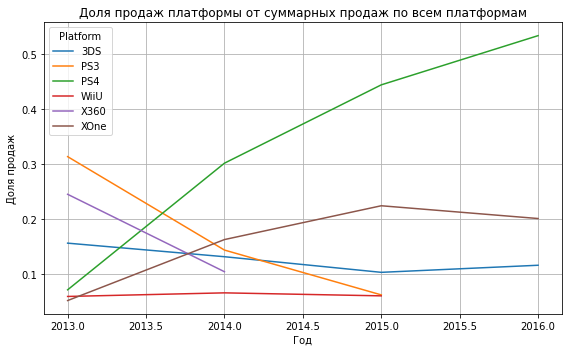

In [21]:
# построим на одном графике продажи для каждой платформы по годам
plt.figure(figsize=(8, 5))

for platform in sales_pivot['platform'].unique():
    platforms = sales_pivot[sales_pivot['platform'] == platform]
    sns.lineplot(data=platforms, x="year_of_release", y="platform_sales_ratio", label=platform)

plt.title('Доля продаж платформы от суммарных продаж по всем платформам')
plt.xlabel('Год')
plt.ylabel('Доля продаж')
plt.legend(title='Platform', loc='upper left')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Какие платформы лидируют по продажам, растут или падают? Из графика выше хорошо видно, что доля платформ PS3 и  X360 на рынке сокращается, в тоже время PS4 и XOne показывают рост. Потенциально прибыльными платформами на сегодняшний день следует считать PS4 и XOne

4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

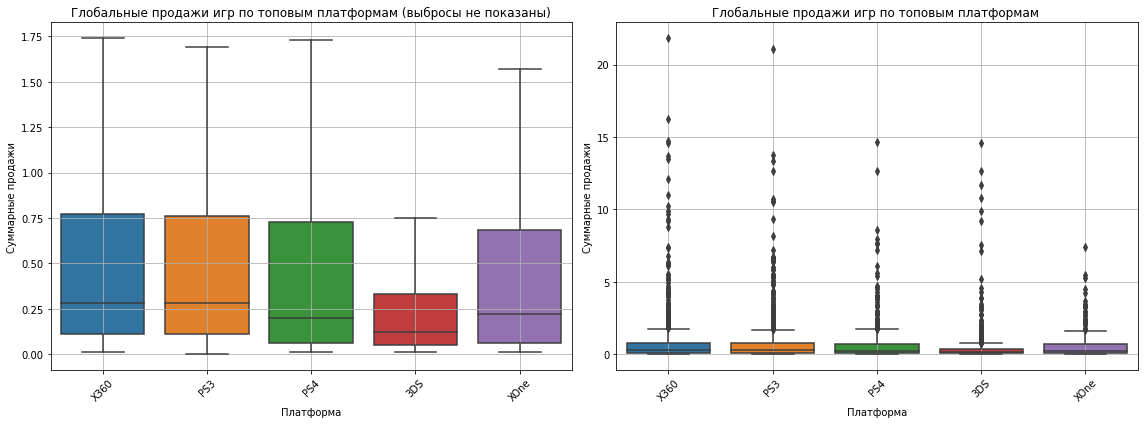

In [22]:
# Создадим список топ платформ по сумме их продаж и выберем только 5 топовых,
# при этом нам нужны только данные с 2013 года
top_platforms = (df_2013.groupby('platform')['sales_total']
    .sum().sort_values(ascending=False).head(5)
    )

#print(df_2013[df_2013['platform'] == 'X360']['sales_total'].describe())
#print(df_2013[df_2013['platform'] == 'PS4']['sales_total'].describe())
#print(df_2013[df_2013['platform'] == '3DS']['sales_total'].describe())

# Чтобы изобразить боксплоты рядом друг с другом:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Код для графика слева, без выбросов
sns.boxplot(data=df[df['platform'].isin(top_platforms.index)], x="platform", y="sales_total", showfliers=False, ax=axs[0])
axs[0].set_title('Глобальные продажи игр по топовым платформам (выбросы не показаны)')
axs[0].set_xlabel('Платформа')
axs[0].set_ylabel('Суммарные продажи')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].grid(True)

# Код для графика справа, с выбросами
sns.boxplot(data=df[df['platform'].isin(top_platforms.index)], x="platform", y="sales_total", ax=axs[1])
axs[1].set_title('Глобальные продажи игр по топовым платформам ')
axs[1].set_xlabel('Платформа')
axs[1].set_ylabel('Суммарные продажи')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].grid(True)


plt.tight_layout()
plt.show()

Боксплоты выше демонстрируют распределение продаж у этих платформ за актуальный период (с 2013 года). Выбросы на графике справа не отображаются. График слева демонстрирует выбросы, из которого видно, что довольно много игр, продажи которых выходят за пределы средних показателей.

Наибольший разброс продаж наблюдается для Х360, PS4, платформ (межквартильный размах ~0,7 млн копий). Как видно из анализа выше на 2016 год присутствие платформы X360 на рынке минимальное, а PS4 набирает популярность. Минимальный разброс наблюдается для платформы 3DS (межквартильный размах - 0,24 млн копий), доля проданных ею копий на рынке в период с 2013 по 2016 оставалсь примерно на одном уровне.

5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Платформа: PS4
Коэффициент коррелляции между оценкой пользователей и продажами: -0.032
Коэффициент коррелляции между оценкой критиков и продажами: 0.407


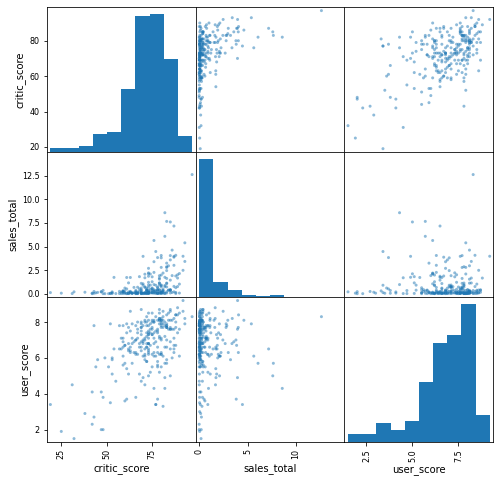

''

In [23]:
# нас снова интересуют данные с 2013 года но только для одной топовой платформы (здесь мы получаем индексы такой платформы)
top_platforms = (df_2013.groupby('platform')['sales_total']
    .sum().sort_values(ascending=False).head(1) 
    )
# сортируем датафрейм по индексам, отобранным выше
df_top_platforms = df[df['platform'].isin(top_platforms.index)]
#print(df_top_platforms)

# сделаем сводную таблицу для этой платформы
df_pivot = (df_top_platforms.pivot_table(index='name', values=['critic_score', 'user_score', 'sales_total'],
                                        aggfunc={'critic_score':'mean', 'user_score': 'mean', 'sales_total': sum})
            .reset_index())
         
# Корреляции между переменными
print('Платформа: PS4')
print('Коэффициент коррелляции между оценкой пользователей и продажами:',\
      df_pivot['user_score'].corr(df_pivot['sales_total']).round(3))
print('Коэффициент коррелляции между оценкой критиков и продажами:',\
      df_pivot['critic_score'].corr(df_pivot['sales_total']).round(3))

pd.plotting.scatter_matrix(df_pivot, figsize=(8, 8)) # диаграммы рассеяния для оценок и продаж
plt.show()
;


Продаж и оценка критиков связаны положительным к коэффициентов корреляции равным 0.407. В целом, есть взаимосвязь наблюдается, чем выше оценка критиков, тем лучше продажи игры. При этом не наблюдается зависимости между оценкой игроков и продажами (коэффициент корреляции -0.032)

6. Соотнесите выводы с продажами игр на других платформах

In [24]:
# проверим выводы и на других топовых платформах
platforms = ['PS3', 'XOne', '3DS', 'X360']

# В цикле для каждой платформы посчитаем коэффициент корреляции между оценкой и продажами
for platform in platforms:
    df_platform = df_2013[df_2013['platform'] == platform]
    
    df_pivot = (df_platform.pivot_table(index='name', values=['critic_score', 'user_score', 'sales_total'],
                                        aggfunc={'critic_score':'mean', 'user_score': 'mean', 'sales_total': sum})
                .reset_index())
    
    user_score_corr = df_pivot['user_score'].corr(df_pivot['sales_total']).round(3) # корреляция между оценкой пользователей и продажами
    critic_score_corr = df_pivot['critic_score'].corr(df_pivot['sales_total']).round(3) # корреляция между оценкой критиков и продажами
    
    # Выведем значения на экран
    print(f'Платформа: {platform}')
    print('Коэффициент коррелляции между оценкой пользователей и продажами:', user_score_corr)
    print('Коэффициент коррелляции между оценкой критиков и продажами:', critic_score_corr)
    print('\n')

Платформа: PS3
Коэффициент коррелляции между оценкой пользователей и продажами: 0.002
Коэффициент коррелляции между оценкой критиков и продажами: 0.334


Платформа: XOne
Коэффициент коррелляции между оценкой пользователей и продажами: -0.069
Коэффициент коррелляции между оценкой критиков и продажами: 0.417


Платформа: 3DS
Коэффициент коррелляции между оценкой пользователей и продажами: 0.242
Коэффициент коррелляции между оценкой критиков и продажами: 0.357


Платформа: X360
Коэффициент коррелляции между оценкой пользователей и продажами: -0.012
Коэффициент коррелляции между оценкой критиков и продажами: 0.35




С другими топовыми платформами ситуация выглядит также - небольшой положительный коэффициент корреляции между оценкой критиков и продажами и почти нулевой коэффициент для пользовательской оценки и продажами (исключение - платформа 3DS, для нее оценка пользователей и продажи связаны коэффициентом корреляции 0.242)

7. Посмотрим на общее распределение игр по жанрам. 

,genre,sales_total
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


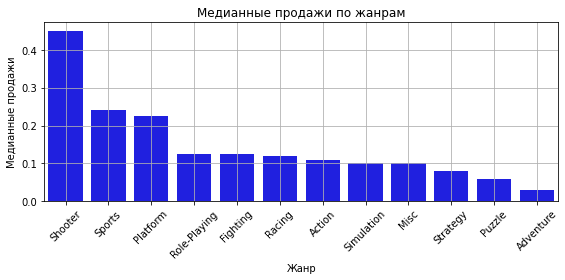

In [25]:
# сводная таблица по жанрам и продажам для них
genre = (df_2013.pivot_table(index='genre', values='sales_total', aggfunc='median').reset_index().
        sort_values(by='sales_total', ascending=False))
display(genre)

# график для распределения продаж по жанрам
plt.figure(figsize=(8, 4))
sns.barplot(data=genre, x='genre', y='sales_total', color='blue')
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()

Что можно сказать о самых прибыльных жанрах: таковыми являются шутеры (медианные продажи составляют 0,45 млн копий), далее примерное на одном уровне спортивные игры и платформеры (0,23 млн копий), ролевые, файтинги, гонки и экшены продаются по 100 млн копий.

#### Исследовательский анализ данных

Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Пользователь Северной Америки**

In [26]:
# функция для построения графиков
def generate_bar_plot(data, x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(6, 3))
    sns.barplot(data=data, x=x, y=y, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

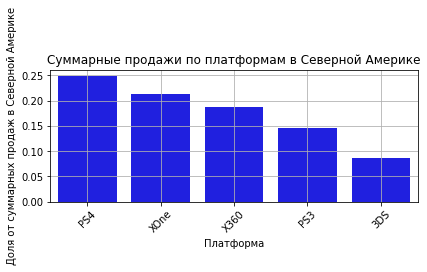

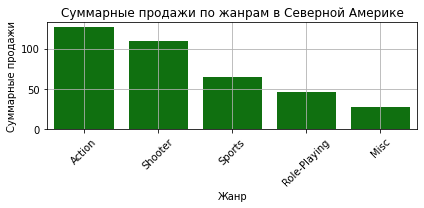

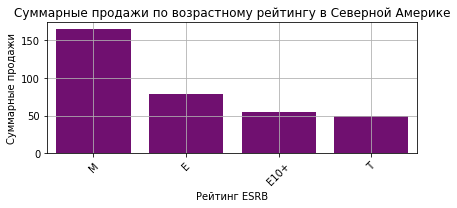

In [27]:
# Изучим самые популярные платформы в Северной Америке
na_market = df_2013.pivot_table(index=['platform'], values=['na_sales'], 
                    aggfunc={'na_sales':sum}).reset_index().sort_values(by='na_sales', ascending=False)

# добавим столбец с долей продажи платформы от общих продаж
na_market['platform_sales_ratio'] = na_market['na_sales'] / na_market['na_sales'].sum()
#display(na_market)

# график для распределения продаж по платформам
generate_bar_plot(na_market.head(5), 'platform', 'platform_sales_ratio', \
                  'Суммарные продажи по платформам в Северной Америке', 'Платформа', \
                  'Доля от суммарных продаж в Северной Америке', 'blue')


# Изучим самые популярные жанры в Северной Америке
na_genre = df_2013.pivot_table(index=['genre'], values=['na_sales'], 
                    aggfunc={'na_sales':sum}).reset_index().sort_values(by='na_sales', ascending=False)
#display(na_genre)

# график для распределения продаж по жанрам
generate_bar_plot(na_genre.head(5), 'genre', 'na_sales', 'Суммарные продажи по жанрам в Северной Америке',\
                  'Жанр', 'Суммарные продажи', 'green')


# Изучим самые влияние рейтинга ESRB на продажи в Северной Америке
na_rating = df_2013.pivot_table(index=['rating'], values=['na_sales'], 
                    aggfunc={'na_sales':sum}).reset_index().sort_values(by='na_sales', ascending=False)
#display(na_rating)

# график для распределения продаж по рейтингу
generate_bar_plot(na_rating, 'rating', 'na_sales', 'Суммарные продажи по возрастному рейтингу в Северной Америке',\
                  'Рейтинг ESRB', 'Суммарные продажи', 'purple')



Пользователь Северной Америки
- Самые популярные платформы (топ-5): PS4 (по продажам занимает четверть рынка), XOne (доля на рынке 21%), X360, PS3, 3DS совместно занимают около 40% рынка.
- Самые популярные жанры (топ-5): Action, Shooter, Sports, Role-Playing, Misc (сюда входят игры, не вощедшие в другие катеогрии). Северная Америка, особенно США, известны своей индустрией не только Экшен игр, но и фильмами такого же женра. Следовательно, у пользователя этого региона есть запрос на наполненные событиями игры (Шутеры также можно объяснить этим). Кроме того, третье место в рейтинге жанров занимают спортивные игры. Хорошо известна увлеченность американцев спортивным играми, поэтому популярность этого жанра вполне объяснима. Ролевые игры (когда игрок становится неким персонажем игры и должен преодолеть препятнствия и, например, победить монстра) и игры, не вошедшие в другие категории занимают четвертое и пятое места. 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе? Больше всего (больше 150 млн копий) продаются игры категории "М", то есть «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Хуже всего продаются игры для подростков (с 2013 года было продано 50 млн копий).

**Пользователь ЕС**

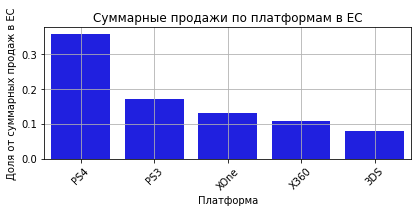

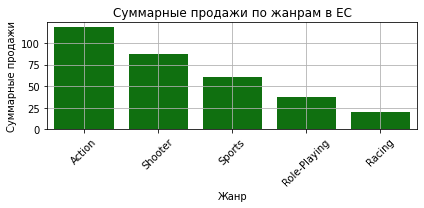

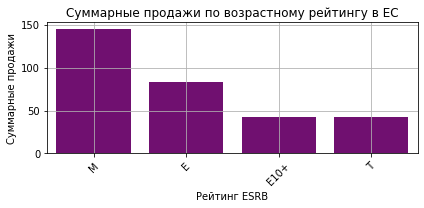

In [28]:
# Изучим самые популярные платформы в ЕС
eu_market = df_2013.pivot_table(index=['platform'], values=['eu_sales'], 
                    aggfunc={'eu_sales':sum}).reset_index().sort_values(by='eu_sales', ascending=False)

# добавим столбец с долей продажи платформы от общих продаж
eu_market['platform_sales_ratio'] = eu_market['eu_sales'] / eu_market['eu_sales'].sum()
#display(eu_market)

# график для распределения продаж по платформам
generate_bar_plot(eu_market.head(5), 'platform', 'platform_sales_ratio', 'Суммарные продажи по платформам в ЕС',\
                  'Платформа', 'Доля от суммарных продаж в ЕС', 'blue')

# Изучим самые популярные жанры в ЕС
eu_genre = df_2013.pivot_table(index=['genre'], values=['eu_sales'], 
                    aggfunc={'eu_sales':sum}).reset_index().sort_values(by='eu_sales', ascending=False)
#display(eu_genre)

# график для распределения продаж по жанрам
generate_bar_plot(eu_genre.head(5), 'genre', 'eu_sales', 'Суммарные продажи по жанрам в EC',\
                  'Жанр', 'Суммарные продажи', 'green')


# Изучим самые влияние рейтинга ESRB на продажи в EC
eu_rating = df_2013.pivot_table(index=['rating'], values=['eu_sales'], 
                    aggfunc={'eu_sales':sum}).reset_index().sort_values(by='eu_sales', ascending=False)
#display(eu_rating)

# график для распределения продаж по рейтингу
generate_bar_plot(eu_rating, 'rating', 'eu_sales', 'Суммарные продажи по возрастному рейтингу в EC',\
                  'Рейтинг ESRB', 'Суммарные продажи', 'purple')

Пользователь ЕС
- Самые популярные платформы (топ-5): PS4 (36% рынка), PS3 (17%), XOne (доля на рынке 13%), X360 и 3DS совместно занимают около 18% рынка.
- Самые популярные жанры (топ-5): Action, Shooter, Sports, Role-Playing, Raсing. Распределение игр по жанрам у европейского пользователя почти совпадает с пользователем Северной Америки. Первые места заняли Экшен игры и Шутеры. Следовательно, у пользователя этого региона также есть запрос на наполненные событиями игры. Кроме того, третье место в рейтинге жанров занимают спортивные игры. Европейцы также увлечены спортом, в частности, например, футболом или регби, поэтому популярность этого жанра вполне объяснима. Ролевые игры можно объяснить психологией человека. Обычно такие игры представляют совершенно новый мир, в который очень интересно погрузаить, более того, предоставляется возможность играть с друзьями и побеждать с друзьями, что увеличивает вовлеченность игроков в действие. Пятое место у европейцев занимают гонки, причина может быть в невозможности устраивать гонки в Европе (маленькая территория, возможны гонки только на треках, как, например, Формула 1; мало скоростных трасс; жесткие скоростные ограничения для водителей).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе? Распределение по возрастным категориям совпадает с пользователем Северной Америки. Больше всего (около 150 млн копий) продаются игры категории "М", то есть «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Дальше категории "Для всех" и "Для всех от 10 лет и старше". Хуже всего продаются игры для подростков (с 2013 года было продано меньше 50 млн копий).

**Пользователь Японии**

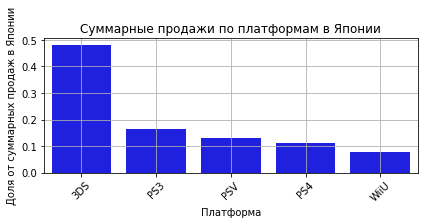

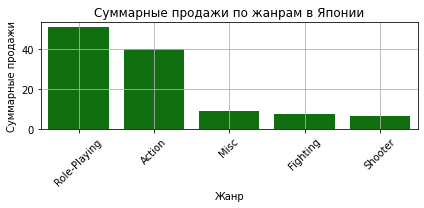

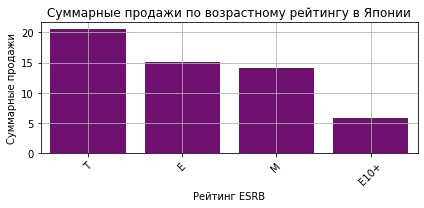

In [29]:
# Изучим самые популярные платформы в JP
jp_market = df_2013.pivot_table(index=['platform'], values=['jp_sales'], 
                    aggfunc={'jp_sales':sum}).reset_index().sort_values(by='jp_sales', ascending=False)

# добавим столбец с долей продажи платформы от общих продаж
jp_market['platform_sales_ratio'] = jp_market['jp_sales'] / jp_market['jp_sales'].sum()
#display(jp_market)

# график для распределения продаж по платформам
generate_bar_plot(jp_market.head(5), 'platform', 'platform_sales_ratio', 'Суммарные продажи по платформам в Японии',\
                  'Платформа', 'Доля от суммарных продаж в Японии', 'blue')


# Изучим самые популярные жанры в JP
jp_genre = df_2013.pivot_table(index=['genre'], values=['jp_sales'], 
                    aggfunc={'jp_sales':sum}).reset_index().sort_values(by='jp_sales', ascending=False)
#display(jp_genre)

# график для распределения продаж по жанрам
generate_bar_plot(jp_genre.head(5), 'genre', 'jp_sales', 'Суммарные продажи по жанрам в Японии',\
                  'Жанр', 'Суммарные продажи', 'green')


# Изучим самые влияние рейтинга ESRB на продажи в EC
jp_rating = df_2013.pivot_table(index=['rating'], values=['jp_sales'], 
                    aggfunc={'jp_sales':sum}).reset_index().sort_values(by='jp_sales', ascending=False)
#display(eu_rating)

# график для распределения продаж по рейтингу
generate_bar_plot(jp_rating, 'rating', 'jp_sales', 'Суммарные продажи по возрастному рейтингу в Японии',\
                  'Рейтинг ESRB', 'Суммарные продажи', 'purple')

Пользователь Японии
- Самые популярные платформы (топ-5): одназначный лидер на рынке 3DS (48% рынка), дальше расположились PS3 (16%), PSV (13%), PS4 (11%), WiiiU (8%).
- Самые популярные жанры (топ-5) у японцев отличаются от европейцев: Role-Playing, Action, Misc, Fighting, Shooter. Известна любовь Японии к аниме и вымышленным мирам, поэтому первые места в жанре рейтингов занимают ролевые игры и экшены. Далее расположились игры, не отнесенные к другим категория (miscellaneous), файтинги (вроде известного Мортал Комбат) и шутеры (две последние категории по-видимому позволяют подросткам, избавиться от негативных эмоций на игровом сопертике). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе? Рынок Японии меньше, однако лидирующую позицию тут занимают игры для подростков (20 млн проданных копий с 2013 года), далее идут игры для всех и врослых (примерное одинаковые 15 млн копий), последнее место занимают игры для всех с 10 лет.

#### Исследовательский анализ данных

Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза** состоит в том, что средние пользовательские рейтинги для этих платформ не меют значимых статистических различий

**Альтернативная гипотеза** состоит в том, что есть значимые стат. различия в пользовательских рейтингах этих платформ.

Для проверки гипотезы применим критерий st.ttest_ind позволяющий сравнивать средние двух независимых выборок. Будем проверять двустороннюю гипотезу. Уровень стат. значимости зададим 0.05


In [30]:
# Для последующего расчета гипотез необходимо удалить нулевые значения
df_xone = df_2013[df_2013['platform'] == 'XOne']
df_xone = df_xone.dropna(subset=['user_score'], inplace=False)
#df_xone.info()

df_pc = df_2013[df_2013['platform'] == 'PC']
df_pc = df_pc.dropna(subset=['user_score'], inplace=False)
#df_pc.info()

In [31]:
#print(df_2013['platform'].unique())

alpha = 0.05 # задаем уровень статистической значимости

results_user_score = st.ttest_ind(
        df_xone['user_score'], 
        df_pc['user_score'],
        equal_var=True)# статтест

# выведем на экран полученное p-значение
print('p-значение:', results_user_score.pvalue)

if results_user_score.pvalue < alpha: # сравним p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


На основании данных нулевая гипотеза не была отвергнута, значит нет оснований утверждать, что средний пользовательский рейтинг платформ Xbox One и PC отличается.

2.1 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Зададим пороговое значение alpha 0.05

**Нулевая гипотеза** состоит в том, что средние пользовательские рейтинги жанров Экшен и Спортивные не имеет значимых статистических различий.

**Альтернативная гипотеза:** Средние пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга  жанра Sports. 

Для проверки гипотезы применим критерий st.ttest_ind позволяющий сравнивать средние двух независимых выборок. Будем проверять правостороннюю гипотезу.


In [32]:
# Для последующего расчета гипотез необходимо удалить нулевые значения
df_action = df_2013[df_2013['genre'] == 'Action']
df_action = df_action.dropna(subset=['user_score'], inplace=False)
#df_action.info()

df_sports = df_2013[df_2013['genre'] == 'Sports']
df_sports = df_sports.dropna(subset=['user_score'], inplace=False)
#df_sports.info()

In [33]:
alpha = 0.05 # задаем уровень статистической значимости

results_genre = st.ttest_ind(
        df_action['user_score'], 
        df_sports['user_score'],
        equal_var=True,
        alternative='greater')# статтест

# выведем на экран полученное p-значение
print('p-значение:', results_genre.pvalue)

if results_genre.pvalue < alpha: # сравним p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.2589161945700115e-28
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве пользовательских рейтингов для action и sports жанров была отвергнута. Следовательно, есть основания утверждать, что экшены имеют более высокий пользовательский рейтинг по сравнению со спортивными играми.

2.2 Дополнительный тест для гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Зададим пороговое значение alpha 0.05

**Нулевая гипотеза** состоит в том, что средние пользовательские рейтинги жанров Экшен и Спортивные не имеет значимых статистических различий.

**Альтернативная гипотеза:** Средние пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга  жанра Sports. 

Для проверки гипотезы применим критерий st.ttest_ind позволяющий сравнивать средние двух независимых выборок. Будем проверять двустороннюю гипотезу. Уровень стат. значимости зададим 0.05

In [34]:
alpha = 0.05 # задаем уровень статистической значимости

results_genre = st.ttest_ind(
        df_action['user_score'], 
        df_sports['user_score'],
        equal_var=True)# статтест

# выведем на экран полученное p-значение
print('p-значение:', results_genre.pvalue)

if results_genre.pvalue < alpha: # сравним p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве пользовательских рейтингов для action и sports жанров была отвергнута. Следовательно, есть основания утверждать, что пользовательский рейтинг для экшенов статистически отличается от пользовательского рейтинга спортивных игр.

### Conclusions
1. The original dataframe contains missing values; in some columns, up to half of the data is missing, indicating poor data quality. Not all columns had correct data types, and column names were not formatted consistently. All these issues were fixed during the data preprocessing stage.

2. The `user_score` column initially contains a large number of missing values that could not be reliably imputed based on existing data. Additionally, the value `tbd` (likely an abbreviation for *to be defined*) was replaced with `NaN`, and the column was converted to the `float` data type. At this stage, removing rows with missing values in `year_of_release` resulted in a loss of 1.6% of the data, while replacing `tbd` values in `user_score` increased the share of missing values by 14.6%.

3. One reason for the large number of missing values may be the low popularity of certain games, resulting in few or no ratings. If we consider games with sales below 200 thousand copies in at least one region, this group covers almost all missing values in the `user_score` column. Another reason may be that user and critic ratings did not exist before a certain period. For example, before 1995, there are only four non-zero values in the `user_score` and `critic_score` columns.

4. The dataframe contains data from 1980 to 2016 (with 2016 potentially being incomplete). The chart above shows that interest in video games steadily increased from 1990 to 2008–2009 (about 1,400 games released per year), followed by a decline. By 2016, the number of released games dropped to around 500. For analysis, it is optimal to consider the period from 1995 (when the number of games first exceeded 200 per year) to 2016. For forecasting 2017, it is more appropriate to use data after 2013, following the sharp decline in releases. Therefore, further analysis was conducted only on data from the relevant period (from 2013 onward).

5. **How long do new platforms emerge and old ones disappear?**  
   Leading platforms typically have a lifespan of about 10 years, reaching peak sales within 3–5 years before their sales begin to decline.

6. **Which platforms lead in sales, grow, or decline:**  
   The market share of PS3 and X360 is decreasing, while PS4 and XOne are showing growth. Currently, PS4 and XOne can be considered potentially profitable platforms.

7. Boxplots illustrate the sales distribution of top platforms for the relevant period (from 2013). The plot with outliers shows that there are many games whose sales significantly exceed average values.

- The greatest sales variability is observed for X360 and PS4 (interquartile range ≈ 0.7 million copies). As shown above, by 2016 the presence of X360 on the market was minimal, while PS4 continued to gain popularity.  
- The lowest variability is observed for the 3DS platform (interquartile range ≈ 0.24 million copies); its market share remained relatively stable from 2013 to 2016.

8. Sales and critic scores have a positive correlation coefficient of 0.407. Overall, *there is a relationship: higher critic scores are associated with better game sales*. At the same time, there is no observable relationship between user scores and sales (correlation coefficient −0.032). A similar pattern is observed for other top platforms, with a small positive correlation between critic scores and sales and an almost zero correlation between user scores and sales (the exception is the 3DS platform, where user scores and sales have a correlation of 0.242).

9. **What can be said about the most profitable genres:**  
   Shooters are the most profitable genre (median sales of 0.45 million copies), followed by sports games and platformers (0.23 million copies). Role-playing games, fighting games, racing games, and action games sell around 0.1 million copies.

10. **North American user**
- **Most popular platforms (top-5):** PS4 (25% market share), XOne (21%), while X360, PS3, and 3DS together account for about 40% of the market.
- **Most po**
